In [1]:
import pandas as pd
import numpy as np

In [2]:
# true_values = pd.rea
df = pd.read_csv('redoxpredictions.csv')
true_values = df['y_true'].to_numpy()
predicted_values = df['predicted probability for positive class'].to_numpy()

In [3]:
def perf_measure(y_actual, y_hat):
   TP = 0
   FP = 0
   TN = 0
   FN = 0

   for i in range(len(y_hat)): 
      if y_actual[i]==y_hat[i]==1:
         TP += 1
      if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
         FP += 1
      if y_actual[i]==y_hat[i]==0:
         TN += 1
      if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
         FN += 1

   return (TP, FP, TN, FN)

In [4]:
def findStats(y_true,predictions,threshold, stats = True):
    predictions = np.copy(predictions)
    predictions[predictions > threshold] = 1
    predictions[predictions < 1] = 0
    predictions = predictions.astype(int)
    # df['new'] = predictions
    
    # return
    # print(np.sum(predictions))
    
    total_predictions = len(predictions)
    correct_predictions = (y_true == predictions).sum()
    # Find True Positive, False Positive, True Negative, False Negative
    TP, FP, TN, FN =perf_measure(y_true,predictions) 
    
    accuracy, precision, recall, f1, tpr, fpr = (0,0,0,0,0,0)
    # Accuracy
    accuracy = correct_predictions/total_predictions
    # precision
    if not (TP+FP) == 0: precision = TP/(TP+FP)
    # Recall
    if not (TP+FN) == 0: recall = TP/(TP+FN)
    # F1 Score
    if not TP+((1/2)*(FP+FN)) == 0: f1 = TP/(TP+((1/2)*(FP+FN)))
    # TPR
    if not TP+FN == 0: tpr = TP/(TP+FN)
    # FPR
    if not TP+FN == 0: fpr = FP/(FP+TN)
    
    if stats:
        print(f"For Threshold: {threshold}")
        print('Accuracy:',round(accuracy,4))
        print('Precision:',round(precision,4))
        print('Recall',round(recall,4))
        print('F1',round(f1,4))
        print('TPR',round(tpr,4))
        print('FPR',round(fpr,4))
    
    return (accuracy, precision, recall, f1, tpr, fpr)

## Q#1.1 

In [5]:
findStats(true_values,predicted_values,0.5)

For Threshold: 0.5
Accuracy: 0.7092
Precision: 0.7018
Recall 0.5884
F1 0.6401
TPR 0.5884
FPR 0.196


(0.709211986681465,
 0.7018072289156626,
 0.5883838383838383,
 0.6401098901098901,
 0.5883838383838383,
 0.19603960396039605)

## Q#1.2

In [6]:
findStats(true_values,predicted_values,0.3) 

For Threshold: 0.3
Accuracy: 0.5782
Precision: 0.511
Recall 0.9407
F1 0.6622
TPR 0.9407
FPR 0.7059


(0.5782463928967814,
 0.5109739368998628,
 0.9406565656565656,
 0.6622222222222223,
 0.9406565656565656,
 0.7059405940594059)

In [7]:
findStats(true_values,predicted_values,0.7)

For Threshold: 0.7
Accuracy: 0.5649
Precision: 0.7857
Recall 0.0139
F1 0.0273
TPR 0.0139
FPR 0.003


(0.564927857935627,
 0.7857142857142857,
 0.013888888888888888,
 0.02729528535980149,
 0.013888888888888888,
 0.0029702970297029703)

## Q#1.3

When threshold is 0.3 or 0.7 the accuracy is around 50-60% because their threshold is too extreme which means it effects a lot on the predictions values. When threshold is 0.7 only small number of predictions are 1 and for 0.3 a very large number of predictions become 1 for both cases it effect the accuracy. For 0.5 the accuracy jumps up to 70% as it is a moderate threshold and number of 1's and 0's are around same.

## Q#1.4

In [8]:
thresholds = np.linspace(0,1,10)
recalls = []
precisions = []
for threshold in thresholds:
    # _,t_precision, t_recall, _, _, _=findStats(true_values,predicted_values,threshold,False)
    temp=findStats(true_values,predicted_values,threshold,False)
    # break
    precisions.append(temp[1])
    recalls.append(temp[3])
print('Recalls:',recalls)
print('Precisions:',precisions)

Recalls: [0.6106399383191982, 0.6106399383191982, 0.6319218241042345, 0.672645739910314, 0.6566806470940683, 0.5072933549432739, 0.20793140407288319, 0.0, 0.0, 0.0]
Precisions: [0.43951165371809103, 0.43951165371809103, 0.46634615384615385, 0.5555555555555556, 0.6248574686431014, 0.7081447963800905, 0.6879432624113475, 0, 0, 0]


## Q#1.5

Text(0.5, 0, 'Threshold')

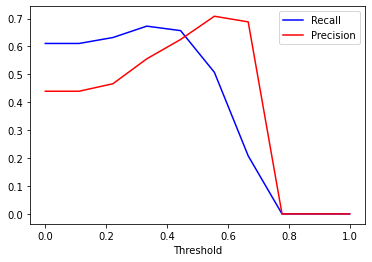

In [9]:
import matplotlib.pyplot as plt
plt.plot(thresholds,recalls,label="Recall",color="blue")
plt.plot(thresholds,precisions,label="Precision",color="red")
plt.legend()
plt.xlabel('Threshold')

## Q#1.6

Text(0.5, 0, 'recalls')

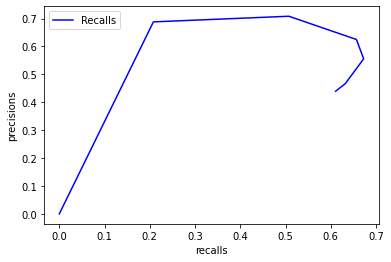

In [10]:
plt.plot(recalls,precisions,label="Recalls",color="blue")
plt.legend()
plt.ylabel('precisions')
plt.xlabel('recalls')

# Q2

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def findDistance(p1,p2):
    return np.sqrt((p2[0]-p1[0])**2+(p2[1]-p1[1])**2)

In [13]:
def findMean(arr):
    size = len(arr)
    if size == 0:
        x,y =(0,0)
    else:
        x = int(sum([i[0] for i in arr])/size)
        y = int(sum([i[1] for i in arr])/size)
    return (x,y)

In [14]:
data = [(5,3),(10,15),(15,12),(24,10),(30,45),(85,70),(71,80),(60,78),(55,52),(80,91)]
sse_data = []
u1 = (5,3)
u2 = (10,15)

for i in range(10):
    c1 = []
    c2 = []
    temp = data[i]
    # u1 = (temp[0] - u1[0],temp[1]-u1[1]) 
    # u2 = (temp[0] - u2[0],temp[1]-u2[1]) 
    for s_data in data:
        if s_data != u1 and s_data != u2:
            # print(findDistance(u1,s_data),findDistance(u2,s_data))
            if findDistance(u1,s_data) < findDistance(u2,s_data):
                c1.append(s_data)
            else:
                c2.append(s_data) 
        # print(f"{u1} - {s_data}",findDistance(u1,s_data))
        # print(f"{u2} - {s_data}",findDistance(u2,s_data))
    u1 = findMean(c1)
    u2 = findMean(c2)
    
    print(f"======================= Iteration: {i+1} =======================")
    print('cluster 1',c1)
    print('cluster 2',c2)
    print('u1',u1)
    print('u2',u2)
    print('\n\n')
    sse_data.append([u1,c1,u2,c2])

======================= Iteration: 1 =======================
cluster 1 []
cluster 2 [(15, 12), (24, 10), (30, 45), (85, 70), (71, 80), (60, 78), (55, 52), (80, 91)]
u1 (0, 0)
u2 (52, 54)



======================= Iteration: 2 =======================
cluster 1 [(5, 3), (10, 15), (15, 12), (24, 10)]
cluster 2 [(30, 45), (85, 70), (71, 80), (60, 78), (55, 52), (80, 91)]
u1 (13, 10)
u2 (63, 69)



======================= Iteration: 3 =======================
cluster 1 [(5, 3), (10, 15), (15, 12), (24, 10), (30, 45)]
cluster 2 [(85, 70), (71, 80), (60, 78), (55, 52), (80, 91)]
u1 (16, 17)
u2 (70, 74)



======================= Iteration: 4 =======================
cluster 1 [(5, 3), (10, 15), (15, 12), (24, 10), (30, 45)]
cluster 2 [(85, 70), (71, 80), (60, 78), (55, 52), (80, 91)]
u1 (16, 17)
u2 (70, 74)



======================= Iteration: 5 =======================
cluster 1 [(5, 3), (10, 15), (15, 12), (24, 10), (30, 45)]
cluster 2 [(85, 70), (71, 80), (60, 78), (55, 52), (80, 91)]
u1 (1

## Q#2.2

[(5, 3), (10, 15), (15, 12), (24, 10), (30, 45)]


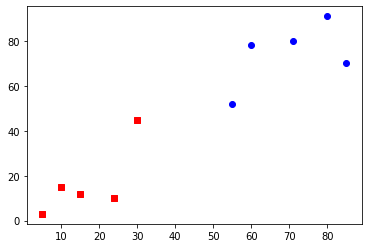

In [15]:
print(c1)
c1x = [i[0] for i in c1]
c1y = [i[1] for i in c1]
c2x = [i[0] for i in c2]
c2y = [i[1] for i in c2]
plt.scatter(c1x,c1y,marker='s',color='red')
plt.scatter(c2x,c2y,marker='o',color='blue')


## Q#2.3

In [16]:
sse1 = []
sse2 = []
for dt in sse_data:
    center1 = dt[0]
    temp1 = []
    for td in dt[1]:
        temp1.append(findDistance(center1,td))
    sse1.append(sum(temp1))
    center2 = dt[2]
    temp2 = []
    for td in dt[1]:
        temp2.append(findDistance(center2,td))
    sse2.append(sum(temp2))

Text(0.5, 0, 'Iterations')

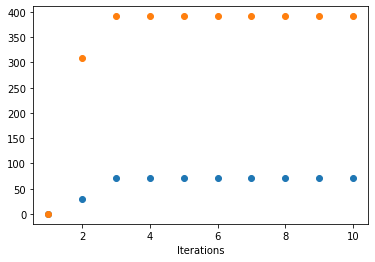

In [17]:
x = np.linspace(1,10,10)
plt.scatter(x,sse1)
plt.scatter(x,sse2)
plt.xlabel('Iterations')

## Q#3

In [10]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def kmeans(clusters):
    km = KMeans(n_clusters=clusters, init='k-means++', n_init=10)
    return km

In [51]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
def train_km(n_clusters,data):
    km = kmeans(n_clusters)
    km.fit(data)
    labels = km.labels_
    centers = km.cluster_centers_
    unique_labels = np.unique(labels)
    sse = km.inertia_
    avg_silhouette = silhouette_score(data,labels,metric='euclidean')
    sil_samples = silhouette_samples(data,labels,metric='euclidean')
    
    # cluster_centers = [data[km.labels_ == i].mean(axis=0) for i in range(n_clusters)]

    # clusterwise_sse = [0, 0, 0]
    # for point, label in zip(data, km.labels_):
    #     clusterwise_sse[label] += np.square(point - cluster_centers[label]).sum()
        
    return (km,labels, unique_labels, centers,sse,avg_silhouette,sil_samples)

In [31]:
def plot_clusters(clusters,data,labels,centers):
    colors = ['#4EACC5', '#FF9C34', '#4E9A06']
    plt.figure
    for k, col in zip(range(clusters), colors):
        my_members = labels == k
        cluster_center = centers[k]
        plt.plot(data[my_members, 0], data[my_members, 1], 's',
                markerfacecolor=col, markersize=4)
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                markeredgecolor='k', markersize=6)
    plt.title('KMeans')    
    plt.grid(True)

In [48]:
def plot_silhouette(km,df1,silhouette_vals):
   y_predict = km.fit_predict(df1)
   fig, ax = plt.subplots(1,1,figsize=(15,5))
   # silhouette ploty_ticks = []
   y_lower = y_upper = 0
   for i,cluster in enumerate(np.unique(y_predict)):
      cluster_silhouette_vals = silhouette_vals[y_predict ==cluster]
      cluster_silhouette_vals.sort()
      y_upper += len(cluster_silhouette_vals)
      
      ax.barh(range(y_lower,y_upper),cluster_silhouette_vals,height =1);   
      ax.text(-0.03,(y_lower+y_upper)/2,str(i+1))
      y_lower += len(cluster_silhouette_vals)       
      # Get the average silhouette score    
      avg_score = np.mean(silhouette_vals)
      ax.axvline(avg_score,linestyle ='--',linewidth =2,color = 'green')
      ax.set_yticks([])
      ax.set_xlim([-0.1, 1])
      ax.set_xlabel('Silhouette coefficient values')
      ax.set_ylabel('Cluster labels')
      ax.set_title('Silhouette plot for the various clusters');
      
      
      # scatter plot of data colored with labels
      
      # ax[1].scatter(df2['petal length (cm)'],
      # df2['petal width (cm)'] , c = y_predict);    ax[1].scatter(centroids[:,0],centroids[:,1],
      # marker = '*' , c= 'r',s =250);
      # ax[1].set_xlabel('Eruption time in mins')
      # ax[1].set_ylabel('Waiting time to next eruption')
      # ax[1].set_title('Visualization of clustered data', y=1.02)
      
      # plt.tight_layout()
      # plt.suptitle(f' Silhouette analysis using k = {k}',fontsize=16,fontweight = 'semibold')
      # plt.savefig(f'Silhouette_analysis_{k}.jpg')

In [ ]:
# from sklearn.datasets import make_blobs
# batch_size = 45
# centers = [[1, 1], [-1, -1], [1, -1]]
# n_clusters = len(centers)
# data, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)


## Q#3.1 - 3.4

Labels:  [1 1 1 1 1 0 0 0 0 0]
Centers:  [[70.2 74.2]
 [16.8 17. ]]
SSE:  2964.3999999999996
Average Silhouette Score:  0.6586004781412067
Silhouette Values:  [0.75335717 0.79443852 0.80624426 0.74891255 0.22528633 0.71206556
 0.77556859 0.707357   0.33442108 0.72835371]


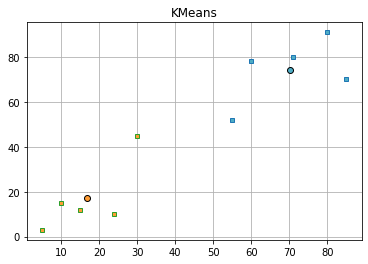

In [54]:
data = np.array([[5,3],[10,15],[15,12],[24,10],[30,45],[85,70],[71,80],[60,78],[55,52],[80,91]])
n_clusters = 2
# km = kmeans(n_clusters)
km,labels, unique_labels, centers,sse,avg_silhouette,sil_samples = train_km(n_clusters,data)
print('Labels: ',labels)
print('Centers: ',centers)
print('SSE: ',sse)
print('Average Silhouette Score: ',avg_silhouette)
print('Silhouette Values: ',sil_samples)
# my_members = labels = 
plot_clusters(n_clusters,data,labels,centers)


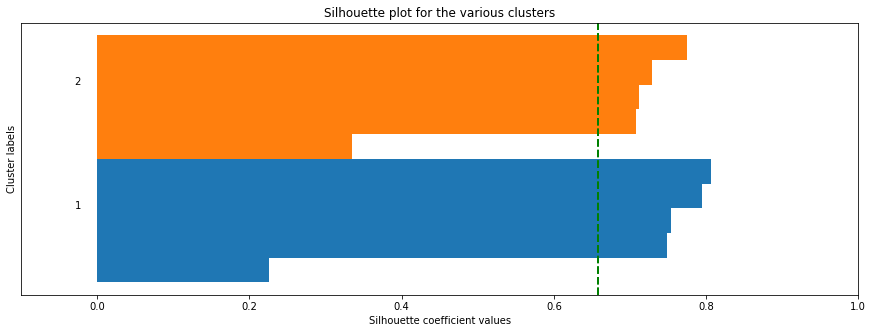

In [55]:
plot_silhouette(km,data,sil_samples)

## Q#3.5

Labels:  [1 1 1 1 2 0 0 0 2 0]
Centers:  [[74.   79.75]
 [13.5  10.  ]
 [42.5  48.5 ]]
SSE:  1198.75
Average Silhouette Score:  0.5846934528951507
Silhouette Values:  [0.73810959 0.76180858 0.79526803 0.6630334  0.33726268 0.5454937
 0.67038486 0.42517804 0.25843372 0.65196193]


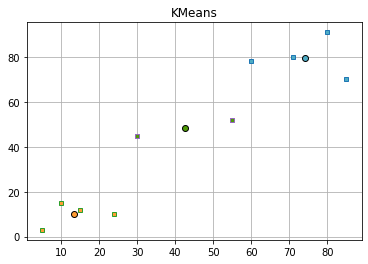

In [52]:
data = np.array([[5,3],[10,15],[15,12],[24,10],[30,45],[85,70],[71,80],[60,78],[55,52],[80,91]])
n_clusters = 3
# km = kmeans(n_clusters)
km,labels, unique_labels, centers,sse,avg_silhouette,sil_samples = train_km(n_clusters,data)
print('Labels: ',labels)
print('Centers: ',centers)
print('SSE: ',sse)
print('Average Silhouette Score: ',avg_silhouette)
print('Silhouette Values: ',sil_samples)
# my_members = labels = 
plot_clusters(n_clusters,data,labels,centers)


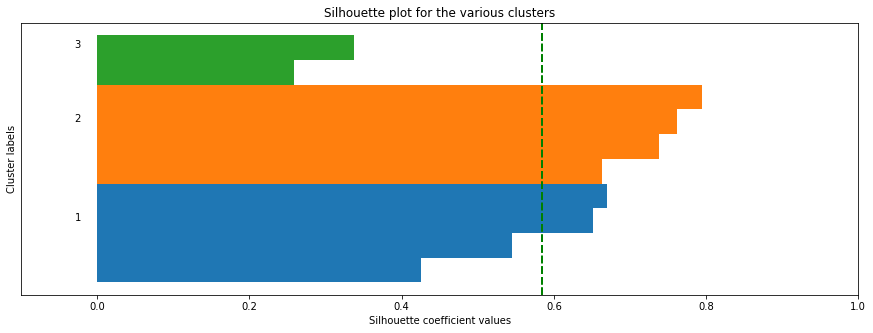

In [53]:
plot_silhouette(km,data,sil_samples)

## Q#3.6

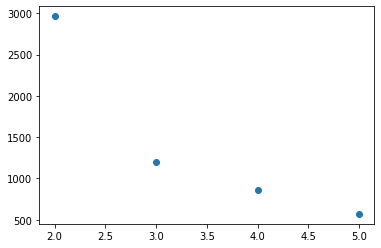

In [57]:
data = np.array([[5,3],[10,15],[15,12],[24,10],[30,45],[85,70],[71,80],[60,78],[55,52],[80,91]])
ks = [2,3,4,5]
sses = []
for k in ks:
    n_clusters = k
    # km = kmeans(n_clusters)
    km,labels, unique_labels, centers,sse,avg_silhouette,sil_samples = train_km(n_clusters,data)
    sses.append(sse)
    
plt.scatter(ks,sses)


<p>Optimal number of clusters are 3</p>

## Q#3.7

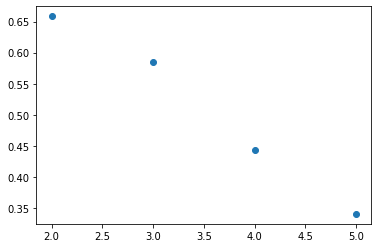

In [58]:
ks = [2,3,4,5]
sil_coefficients = []
for k in ks:
    n_clusters = k
    # km = kmeans(n_clusters)
    km,labels, unique_labels, centers,sse,avg_silhouette,sil_samples = train_km(n_clusters,data)
    sil_coefficients.append(avg_silhouette)
    
plt.scatter(ks,sil_coefficients)